# Testing the Left Arm

**Warning:** Before running this notebook, first make sure you understand the command you run and make sure that the robot can freely move.

**Note:** Also stop all other running Python script or notebook connected to the robot as only one connection can run at the same time.

In [20]:
%matplotlib inline

import time
import numpy as np

from matplotlib import pyplot as plt

## Connect to the left arm

In [2]:
from reachy import Reachy, parts

In [4]:
reachy = Reachy(
    left_arm=parts.LeftArm(io='/dev/cu.usb*', hand='force_gripper'),
)

## Check motors

Check that all motors are presents

In [5]:
for m in reachy.left_arm.motors:
    print(f'{m.name} - pos:{m.present_position} temp:{m.temperature}')

left_arm.shoulder_pitch - pos:-15.933999999999997 temp:38.0
left_arm.shoulder_roll - pos:23.933999999999997 temp:38.0
left_arm.arm_yaw - pos:-71.692 temp:37.0
left_arm.elbow_pitch - pos:-67.297 temp:37.0
left_arm.hand.forearm_yaw - pos:28.006 temp:34.0
left_arm.hand.wrist_pitch - pos:-37.758 temp:36.0
left_arm.hand.wrist_roll - pos:-22.434 temp:35.0
left_arm.hand.gripper - pos:-5.718 temp:36.0


Move the arm and check that the position are moving

## Turn stiff/compliant

In [ ]:
for m in reachy.left_arm.motors:
    m.compliant = False

In [ ]:
for m in reachy.left_arm.motors:
    m.compliant = True

Check that all motors are turning compliant/stiff.

## Goto 0 pos + 90 on the elbow

In [ ]:
for m in reachy.left_arm.motors:
    m.compliant = False

In [ ]:
reachy.goto({
    'left_arm.shoulder_pitch': 0,
    'left_arm.shoulder_roll': 0,
    'left_arm.arm_yaw': 0,    
    'left_arm.elbow_pitch': -90,
    'left_arm.hand.forearm_yaw': 0,
    'left_arm.hand.wrist_pitch': 0,
    'left_arm.hand.wrist_roll': 0,
    'left_arm.hand.gripper': 0,
}, duration=3, wait=True)

Check that everything seems fine.

In [ ]:
for m in reachy.left_arm.motors:
    m.compliant = True

## Record a trajectory and replay it

In [6]:
from reachy.trajectory import TrajectoryRecorder, TrajectoryPlayer

In [7]:
recorder = TrajectoryRecorder(reachy.left_arm.motors)

We will record a move for 10sec. Make sure you hold the robot away from all objects before starting the record.

In [8]:
recorder.start()
time.sleep(10)
recorder.stop()

Turn all motors stiff (try putting the robot in about its starting position of the trajectory).

In [9]:
for m in reachy.left_arm.motors:
    m.compliant = False

In [29]:
player = TrajectoryPlayer(reachy, recorder.trajectories)
player.play(wait=True, fade_in_duration=3)

Turn it back compliant.

In [ ]:
for m in reachy.left_arm.motors:
    m.compliant = True

Look at the recorded traj.

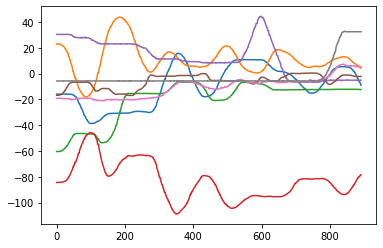

In [30]:
plt.figure()

for k, v in recorder.trajectories.items():
    plt.plot(v, label=k)
# plt.legend()

999


(13.82186391332128, 7.9721783118519705)

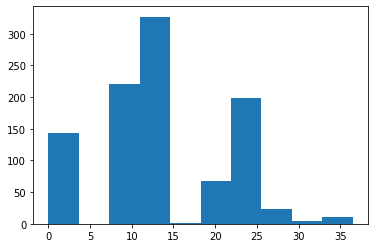

In [31]:
t = np.array(np.diff([l['timestamp'] for l in reachy.left_arm.io.shared_io.lol])) * 1000

print(len(t))

plt.figure()
plt.hist(t)

t.mean(), t.std()

In [32]:
a = np.array([list(a['modules'].keys()) for a in reachy.left_arm.io.shared_io.lol])

from collections import defaultdict

b = defaultdict(int)
for aa in a:
    for aaa in aa:
        b[aaa] += 1
        
b

<ipython-input-32-5bc52002589a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a = np.array([list(a['modules'].keys()) for a in reachy.left_arm.io.shared_io.lol])


defaultdict(int,
            {'dxl_20': 995,
             'dxl_21': 892,
             'dxl_22': 812,
             'dxl_23': 770,
             'dxl_24': 754,
             'dxl_25': 751,
             'dxl_26': 745,
             'dxl_27': 740,
             'force_gripper': 139})

## Grasp objects

Put an object inside the hand of the robot and then run the line below to close it.

In [ ]:
reachy.left_arm.hand.gripper.compliant = False

In [ ]:
reachy.left_arm.hand.close()

Check that the close method returned true. Check the object holds in its hand while moving the arm manually.

Then we reopen the hand.

In [ ]:
reachy.left_arm.hand.open()

In [ ]:
reachy.left_arm.hand.gripper.compliant = True

## Check kinematics

Put the arm in a position where its hand is facing forward and where it can move at least 10cm in all direction.

In [ ]:
for m in reachy.left_arm.motors:
    m.compliant = False

In [ ]:
J0 = [m.present_position for m in reachy.left_arm.motors]

M = reachy.left_arm.forward_kinematics(J0)

M1 = M.copy()
M1[0, 3] += 0.05
J1 = reachy.left_arm.inverse_kinematics(M1, J0)

M2 = M.copy()
M2[0, 3] -= 0.05
J2 = reachy.left_arm.inverse_kinematics(M2, J0)

M3 = M.copy()
M3[1, 3] += 0.05
J3 = reachy.left_arm.inverse_kinematics(M3, J0)

M4 = M.copy()
M4[1, 3] -= 0.05
J4 = reachy.left_arm.inverse_kinematics(M4, J0)

In [ ]:
_ = reachy.goto({m.name: j for j, m in zip(J1, reachy.left_arm.motors)}, duration=1, wait=True)
_ = reachy.goto({m.name: j for j, m in zip(J2, reachy.left_arm.motors)}, duration=1, wait=True)
_ = reachy.goto({m.name: j for j, m in zip(J3, reachy.left_arm.motors)}, duration=1, wait=True)
_ = reachy.goto({m.name: j for j, m in zip(J4, reachy.left_arm.motors)}, duration=1, wait=True)
_ = reachy.goto({m.name: j for j, m in zip(J0, reachy.left_arm.motors)}, duration=1, wait=True)

In [ ]:
for m in reachy.left_arm.motors:
    m.compliant = True

## Check the fans

In [ ]:
reachy.left_arm.shoulder_fan.on()

In [ ]:
reachy.left_arm.shoulder_fan.off()

In [ ]:
reachy.left_arm.elbow_fan.on()

In [ ]:
reachy.left_arm.elbow_fan.off()

In [ ]:
reachy.left_arm.wrist_fan.on()

In [ ]:
reachy.left_arm.wrist_fan.off()